# Capstone | Machine Learning Engineer Nanodegree
## Sentiment Of Reviews 
---

`Sentiment Analysis` problem is a classification problem. In which we predict if a given
review is `positive` or `negative`.
let we have the following two sentences: 
- “Wow, the film is fantastic”
- “I didn’t enjoy watching this film”.

“Wow, the film is fantastic” is classified as a `positive review`

“I didn’t enjoy watching this film” is classified as a `negative review`

So, in this problem we should build an advanced model so as it can predict the sentiment correctly.

The output is binary, `positive` or `negative` (or `1` or `0`) which refer to the positive review and the
negative one respectively.

---

---

## Data Injection

in this section we load our dataset wich consists of 3 sources of reviews:

- Amazon
- Yelp
- imdb

In [1]:
import pandas as pd

In [2]:
df = pd.read_table('sentiment labelled sentences/amazon_cells_labelled.txt', sep='\t', header=None, 
                   names=['review', 'sentiment'])

# append the reviews of imdb to our dataset
df = df.append(pd.read_table('sentiment labelled sentences/imdb_labelled.txt', sep='\t', header=None, 
                   names=['review', 'sentiment']), ignore_index = True)

# append the reviews of yelp to our dataset
df = df.append(pd.read_table('sentiment labelled sentences/yelp_labelled.txt', sep='\t', header=None, 
                   names=['review', 'sentiment']), ignore_index = True)

In [3]:
df.head(n=10)

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [4]:
print(df.axes)

[RangeIndex(start=0, stop=2748, step=1), Index(['review', 'sentiment'], dtype='object')]


In [166]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [167]:
#store number of words in each review
nums_of_words = [len(str(x).split()) for x in df['review']]

In [168]:
# calculate some statistics

max_num = np.max(nums_of_words)
print("max number of words: ", max_num)
min_num = np.min(nums_of_words)
print("min number of words: ", min_num)
mean = np.mean(nums_of_words)
print("mean is: ", mean)
median = np.median(nums_of_words)
print("meadian is: ", median)
std = np.std(nums_of_words)
print("standard deviation is: ", std)

max number of words:  1390
min number of words:  1
mean is:  13.006550218340612
meadian is:  10.0
standard deviation is:  35.81287227056574


In [169]:
y = np.array(nums_of_words)
y.sort()

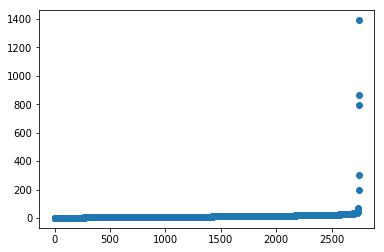

In [170]:
plt.scatter(x=range(1,2749), y = y)
plt.show()

In [171]:
y = [i for i in y if i < 100]
print(len(y))

2743


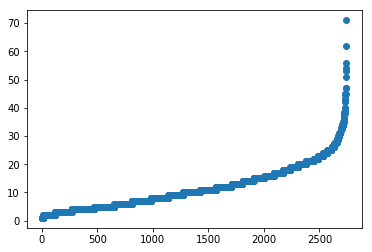

In [172]:
plt.scatter(x=range(1,2744), y = y)
plt.show()

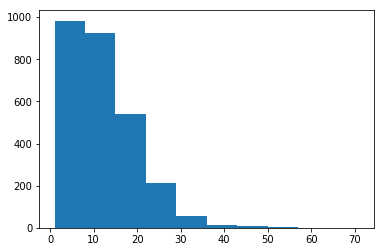

[12, 106, 150, 203, 180, 159, 173, 156, 133, 152, 144, 139, 99, 101, 97, 86, 83, 65, 70, 71, 69, 40, 45, 38, 37, 22, 14, 16, 9, 10, 10, 7, 8, 10]
ratio of new set to old set:  0.987627365356623


In [184]:
plt.hist(y)
plt.show()
h = [y.count(i) for i in range(1,35)]
print(h)
print("ratio of new set to old set: ",sum(h)/2748)

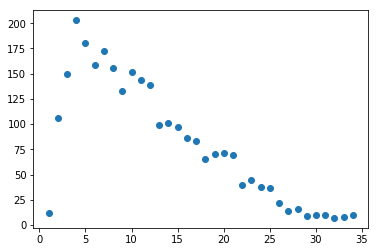

In [182]:
plt.scatter(x=range(1,35),y=h)
plt.show()

now our data set cosists of 2748 examples from the 3 mentioned resources. the index of our set are review, for the text feedback or review, and sentiment which is 1 if the review is positive or 0 if the review is negative.

---

## Data Visualization

let's understand our dataset more.

- How many positive and how many negative reviews?
- Is the dataset balanced or not?
- Is the dataset shuffled or need to be shuffled?

In [365]:
pos_num = sum(df['sentiment'] == 0)
print(pos_num)

1362


In [366]:
neg_num = sum(df['sentiment'] == 1)
print(neg_num)

1386


In [367]:
pos_perc = pos_num/(pos_num + neg_num)
neg_perc = neg_num/(pos_num + neg_num)

In [368]:
print("postive reviews percentage: ", pos_perc)
print("negative reviews percentage: ", neg_perc)

postive reviews percentage:  0.49563318777292575
negative reviews percentage:  0.5043668122270742


So, we consider our dataset is balanced as 0.4% is very small percentage which we can neglect it.

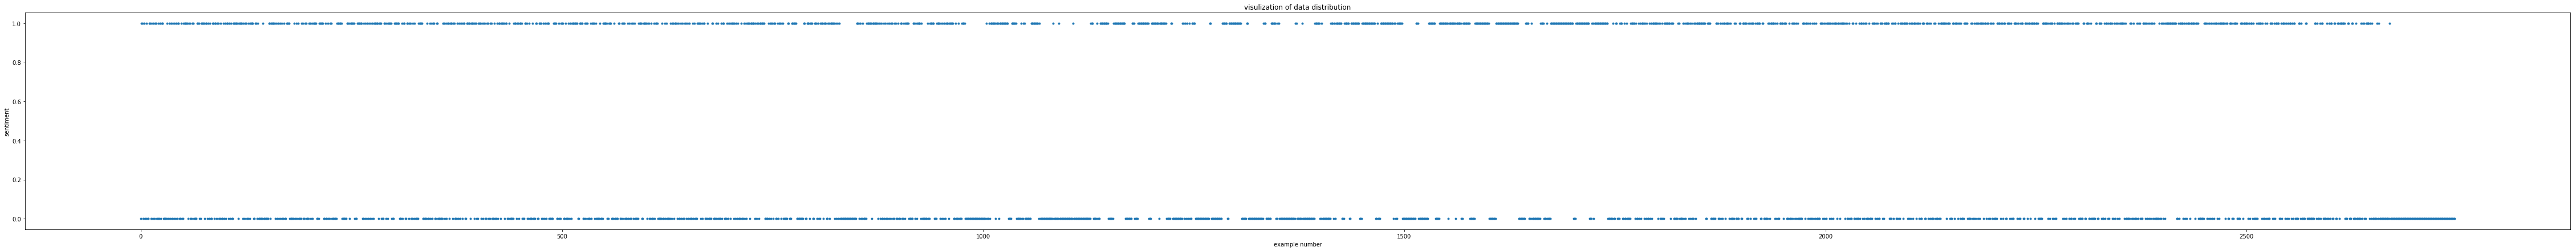

In [370]:
fig, ax = plt.subplots(1,1,figsize=(80,7))
ax.scatter(df['sentiment'].index,df['sentiment'], marker='.')
plt.title('visulization of data distribution')
plt.xlabel('example number')
plt.ylabel('sentiment')
plt.show()

#note: double click on the shown plot to zoom in.

you can zoom in our previous plot and find out that it's shuffled, so the 1 sentiments and 0 sentiments are shuffled and there is no need to shuffle them.

---

## Data Preprocessing

now, it's time to split our data to training and testing sets.

In [371]:
from sklearn.model_selection import train_test_split

In [372]:
x_train, x_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size = 0.2, shuffle=True)
# note that our data is shuffled, but shuffle = True here means to shuffle for split.

In [373]:
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(x_train.shape[0]))
print('Number of rows in the test set: {}'.format(x_test.shape[0]))

Number of rows in the total set: 2748
Number of rows in the training set: 2198
Number of rows in the test set: 550


---
Now, to use our reviews in training and testing we must convert them to another representation not to use them as text sentences.
here we use bag of words to achieve that.
and we use CountVectorizer to achive bag of words.

In [374]:
from sklearn.feature_extraction.text import CountVectorizer

In [375]:
# we convert all text to lowercase before working on them.
# we avoid stop words to consider.
count_vector = CountVectorizer(stop_words='english', lowercase=True, ngram_range=(1,3), max_features=20000)

In [376]:
training_data = count_vector.fit_transform(x_train, y_train)

In [377]:
testing_data = count_vector.transform(x_test)

In [378]:
print("first training example new representation\n",training_data[0])
print("first testing example new representation\n",testing_data[0])

first training example new representation
   (0, 5383)	1
  (0, 8821)	1
  (0, 5369)	1
first testing example new representation
   (0, 1992)	1
  (0, 3949)	1
  (0, 6126)	1
  (0, 6140)	1
  (0, 13309)	1
  (0, 16675)	1


## Training and Evaluation

First we train our selected benchmark on our dataset and print the result accuracy.

In [379]:
from sklearn import svm

In [380]:
benchmark = svm.LinearSVC()

In [381]:
benchmark.fit(training_data, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [382]:
preds = benchmark.predict(testing_data)

In [383]:
from sklearn.metrics import accuracy_score

In [384]:
print("Accuracy score: {:.5f}".format(accuracy_score(y_test, preds)))

Accuracy score: 0.79273


---
Now, let's try two of the naive bayes algorithms to solve our problem.

- Multinomial NB
- Bernoulli NB

---
### [1] Multinomial NB

In [385]:
from sklearn.naive_bayes import MultinomialNB

In [386]:
model = MultinomialNB()
model.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [387]:
predictions = model.predict(testing_data)

In [388]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy score: {:.5f}".format(accuracy_score(y_test, predictions)))
print("Precision score: {:.5f}".format(precision_score(y_test, predictions)))
print("Recall score: {:.5f}".format(recall_score(y_test, predictions)))
print("F1 score: {:.5f}".format(f1_score(y_test, predictions)))

Accuracy score: 0.79091
Precision score: 0.73718
Recall score: 0.87452
F1 score: 0.80000


we can enhance the accuracy by tunning our parameters, we have one parameter which we can tune using GridSearch.

In [389]:
#this function is usful to show the confution matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [390]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

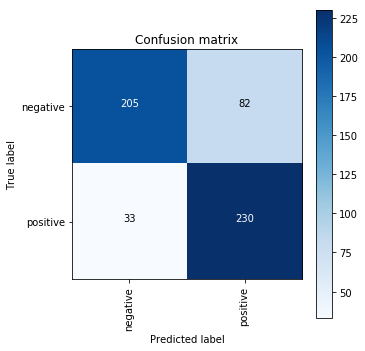

In [391]:
dict_characters = {0 : 'negative', 1 : 'positive'}
confusion_mtx = confusion_matrix(y_test, predictions) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [392]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

In [393]:
#accutally it's a linear search as we tune only one parameter which it's alpha
parameters = {'alpha' : [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.75,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]}
scorer = make_scorer(accuracy_score)

In [394]:
grid_obj = GridSearchCV(model, parameters, scoring=scorer, verbose=10)
grid_fit = grid_obj.fit(training_data, y_train)

Fitting 3 folds for each of 22 candidates, totalling 66 fits
[CV] alpha=0.001 .....................................................
[CV] ............................ alpha=0.001, score=0.735695 -   0.0s
[CV] alpha=0.001 .....................................................
[CV] ............................ alpha=0.001, score=0.725410 -   0.0s
[CV] alpha=0.001 .....................................................
[CV] ............................ alpha=0.001, score=0.740437 -   0.0s
[CV] alpha=0.01 ......................................................
[CV] ............................. alpha=0.01, score=0.738420 -   0.0s
[CV] alpha=0.01 ......................................................
[CV] ............................. alpha=0.01, score=0.726776 -   0.0s
[CV] alpha=0.01 ......................................................
[CV] ............................. alpha=0.01, score=0.740437 -   0.0s
[CV] alpha=0.1 .......................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. alpha=0.8, score=0.758197 -   0.0s
[CV] alpha=0.9 .......................................................
[CV] .............................. alpha=0.9, score=0.764305 -   0.0s
[CV] alpha=0.9 .......................................................
[CV] .............................. alpha=0.9, score=0.755464 -   0.0s
[CV] alpha=0.9 .......................................................
[CV] .............................. alpha=0.9, score=0.766393 -   0.0s
[CV] alpha=1 .........................................................
[CV] ................................ alpha=1, score=0.764305 -   0.0s
[CV] alpha=1 .........................................................
[CV] ................................ alpha=1, score=0.756831 -   0.0s
[CV] alpha=1 .........................................................
[CV] ................................ alpha=1, score=0.771858 -   0.0s
[CV] alpha=1.1 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.5s finished


In [395]:
best_clf = grid_fit.best_estimator_
best_clf.alpha


1.7

In [396]:
best_predictions = best_clf.predict(testing_data)

In [397]:
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.5f}".format(accuracy_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.5f}".format(accuracy_score(y_test, best_predictions)))

Unoptimized model
------
Accuracy score on testing data: 0.79091

Optimized Model
------
Final accuracy score on the testing data: 0.79455


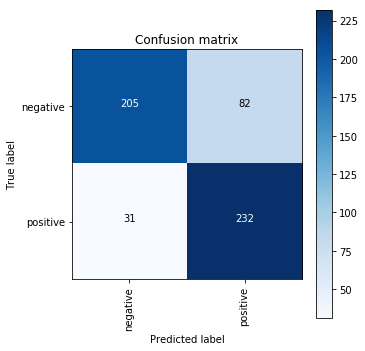

In [398]:
dict_characters = {0 : 'negative', 1 : 'positive'}
confusion_mtx = confusion_matrix(y_test, best_predictions) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

---
### [2] Bernoulli NB

In [399]:
from sklearn.naive_bayes import BernoulliNB

In [400]:
model2 = BernoulliNB()
model2.fit(training_data, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [401]:
predictions2 = model2.predict(testing_data)

In [402]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy score: {:.5f}".format(accuracy_score(y_test, predictions2)))
print("Precision score: {:.5f}".format(precision_score(y_test, predictions2)))
print("Recall score: {:.5f}".format(recall_score(y_test, predictions2)))
print("F1 score: {:.5f}".format(f1_score(y_test, predictions2)))

Accuracy score: 0.80182
Precision score: 0.75329
Recall score: 0.87072
F1 score: 0.80776


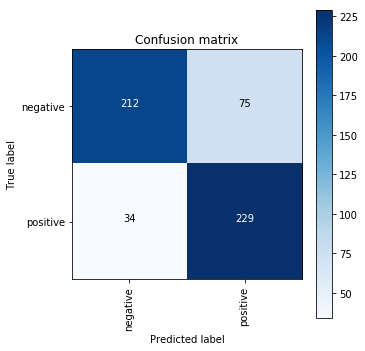

In [403]:
dict_characters = {0 : 'negative', 1 : 'positive'}
confusion_mtx = confusion_matrix(y_test, predictions2) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [404]:
grid_obj2 = GridSearchCV(model2, parameters, scoring=scorer)
grid_fit2 = grid_obj2.fit(training_data, y_train)

In [405]:
best_clf2 = grid_fit2.best_estimator_
best_clf2.alpha

0.4

In [406]:
best_predictions2 = best_clf2.predict(testing_data)

In [407]:
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.5f}".format(accuracy_score(y_test, predictions2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.5f}".format(accuracy_score(y_test, best_predictions2)))

Unoptimized model
------
Accuracy score on testing data: 0.80182

Optimized Model
------
Final accuracy score on the testing data: 0.80909


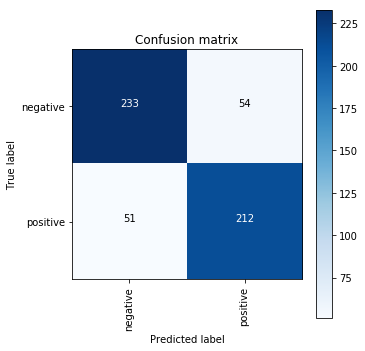

In [408]:
dict_characters = {0 : 'negative', 1 : 'positive'}
confusion_mtx = confusion_matrix(y_test, best_predictions2) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

### Conclusion

##### to summarize our results:
                benchmark       MultinomialNB       BernoulliNB
              ===================================================
    accuracy     79.273%           79.091%            80.182%
    Optimized     -----            79.455%            80.909%

So, It's obvious that we can overcome the benchmark results by using Mutlinomial Naive bayes and Bernoulli Naive bayes.

The benchmark accuracy is 79.273% but Multinomial are less but very close to the benchmark accuracy and Bernoulli Naive Bayes algorithm are better than the benchmark algorithm in solving our problems (as they give a higher accuracy, 79.091% and 80.182% respectively).

So we easily managed to pass the benchmark accuracy without any optimization using Bernouli Naive Bayes.

When we use GridSearch to optimize our two algorithms, we got, 79.455% and 80.909% for the optimized Mutinomial and Bernoulli Naive Bayes models which they are better than the benchmark accuracy.

To compare the Two used algorithms, we find Bernoulli Naive Bayes give better accuracy in solving our preoblems. that is obvious because our problem's output is binary (negative or positive) and Bernoulli Naive Bayes is a good choice for these kinds of problems.

We can conclude that Bernoulli Naive Bayes is better than Multinomial Naive Bayes in solving our problem and it give an accuracy of 80.909% after optimization.

In [411]:
model = best_clf2
# manual test cases
# let's try a positive review.
temp = count_vector.transform(['I am very excited with your product'])
predict = model.predict(temp)
# it should be 1 (positive)
print(predict)

[1]


In [417]:
#manual test cases
# let's try a negative review.
temp = count_vector.transform(['the movie is very slow, I did not ejoy it'])
predict = model.predict(temp)
# it should be 0 (negative)
print(predict)

[0]
